In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm

# TDE 6 Febbraio 2023

Un nuovo tipo di lotteria funzione così. Pagando $c$ euro è possibile comprare un biglietto "gratta e gioca" che una volta eliminata la parte da grattare è associato al numero $t$ compreso tra $\{1, ..., 10\}$ con valori equiprobabili. 
Una volta alla setimana viene generato un valore $x$ compreso tra $[0, 10]$ (insieme continuo stavolta) con equiprobabilità.
I possessori di biglietti associati ad un numero $t$ tale che $x \gt t$ vincono una somma $M$ che si dividono equamente.

Modelliamo l'estrazione del valore $x$ che determina chi ha vinto con una variabile aleatoria $X$ distribuita secondo una legge uniforme continua.

**1.** Quali sono le specificazioni di $X$.

I valori che la variabile aleatoria può assumere sono tutti i numeri reali appartenenti all'intervallo $\left[0,10\right]$.

**2.** Scrivete la forma analitica della funzione di ripartizione di $X$ e disegnate il grafico, mettendo in evidenza le informazioni importanti.

$F_X(x) = \dfrac{x - a}{b - a} \cdot I_{[a,b)} (x) + I_{[b,+\infty)} (x)$.

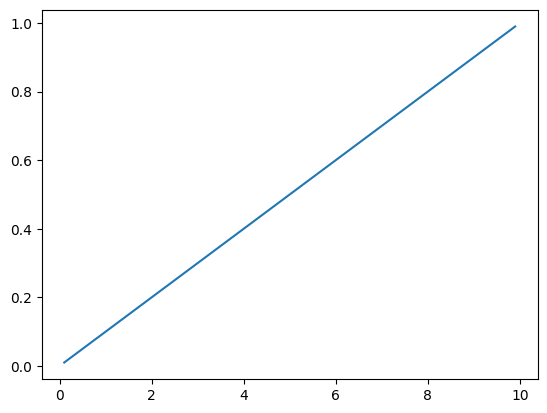

In [2]:
z = st.uniform(0,10)
x = np.linspace(z.ppf(0.01), z.ppf(0.99), num = 20)
plt.plot(x, z.cdf(x))
plt.show()

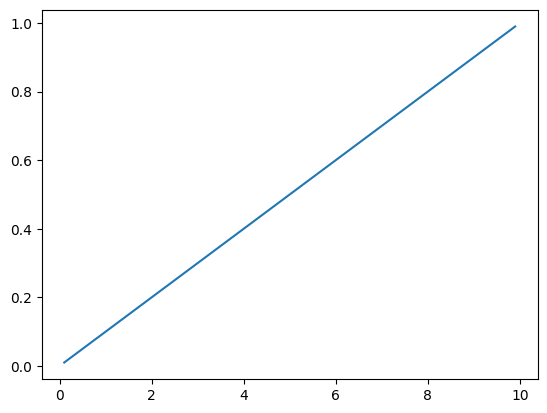

In [2]:
U = st.uniform(0, 10)
x = np.linspace(U.ppf(0.01), U.ppf(0.99), num=20)
plt.plot(x, U.cdf(x))
plt.show()

**3.** Dato $t$ tra $[0,10]$ calcolate la probabilità dell'evento $X \gt t$ esprimendola in funzione del valore $t$.

$P\left(X \gt t\right) = 1 - P\left(X \leq t\right) = 1 - F_X(t) = 1 - \dfrac{t}{10}$ <br>

**4.** Quali sono le spcificazioni che può assumere $X$ dato che sappiamo che si è verificato $X \gt t$.

I valori che la variabile aleatoria $X$ può assumere sapendo che si è verificato l'evento $X \gt t$ sono tutti i valori reali compresi nell'intervallo $(t, 10]$.

Analogamente modelliamo il numero associato al generico biglietto tramite una variabile aleatoria $T$ distribuita secondo una legge uniforme discreta di parametro $10$, indipendente da $X$.

**5.** Quali sono le specificazioni di $T$? 

I valori che la variabile aleatoria T può assumere sono tutti quei valori naturali compresi nell'intervallo $\left\{1,..., 10\right\}$ .

**6.** Scrivete l'enunciato del teorema delle probabilità totali usando, al variare delle specificazioni $t$ di $T$, $X \gt T$ come evento condizionato e $T = t$ come eventi condizionanti

$$
P(A) = \sum_{i = 1}^{10} P\left(A \mid B_i\right) \cdot P\left(B_i\right)
$$
$$
\text{Sostituendo:}
$$
$$
P(X \gt T) = \sum_{i = 1}^{10} P\left(X \gt T \mid T = t_i\right) \cdot P\left(T = t_i\right)
$$

**7.** Calcolate la probabilità dell'evento $X>T$ (suggerimento: se tenete conto dei punti precedenti il calcolo è facile da impostare, ad un certo punto è necessario calcolare una sommatoria. Se non ricordate le formule teoriche potete facilmente scrivere del codice per effettuare questo calcolo).

$$
\text{Sappiamo che la probabilità che T assuma una specificazione t è: } \boxed{P\left(T = t\right) = \dfrac{1}{10}}
$$
$$
\text{inoltre sappiamo che: } P\left(X \gt T \mid T = t\right) = \boxed{P\left(X \gt t\right) = 1 - \dfrac{t}{10}} 
$$
$$
\text{Ora possiamo calcolarci la sommatoria:}
$$
$$
P\left(X \gt T\right) = \sum_{i = 1}^{10} P\left(X \gt T \mid T = t_i\right) \cdot \dfrac{1}{10}
$$
$$
= \dfrac{1}{10} \cdot \sum_{i = 1}^{10} P\left(X \gt t_i\right) = \dfrac{1}{10} \cdot \sum_{i = 1}^{10} \left(1 - \dfrac{t_i}{10}\right)
$$
$$
\text{Usando GAUSS otteniamo}
$$
$$
= \dfrac{1}{10} \cdot \left(10 - \dfrac{11}{2}\right) = \boxed{\dfrac{9}{20}}
$$

In [4]:
X = st.uniform(0,10)
#T = st.uniform(10)

p = 0

for i in range (1,11):
    p = p + (1-X.cdf(i))*1/10

print(p)

0.45


**8.** Fissato $n$ $\in$ $\mathbb{N}$, siano $X_1,..,X_n$ variabili aleatorie __i.i.d__ come $X$ e indipendenti da $T$. Denotiamo $p(n) = P \left(\bigcap_{i = 1}^n \{X_i \gt T\}\right)$. Esprimete $p(n)$ esclusivamente in funzione di $n$, giustificando i passaggi eseguiti.

$$
P \left(\bigcap_{i = 1}^n \{X_i \gt T\}\right) =
$$

sapendo che le variabili aleatorie sono indipendenti, allora possiamo scrivere l'intersezione come la produttoria di $n$ variabili aleatorie
$$
= \prod_{i = 1}^n P\left(X_i \gt T\right)
$$

sapendo che le v.a. sono anche identicamente distribuite, allora possiamo che
$$
= \prod_{i = 1}^n P\left(X > T\right) =
$$
$$
=
\left(\dfrac{9}{20}\right)^n$$

**9.** Tracciate il grafico di $p(n)$ al variare di $n$, scegliendo opportunamente il valore massimo, motivando la scela dello strumento grafico.

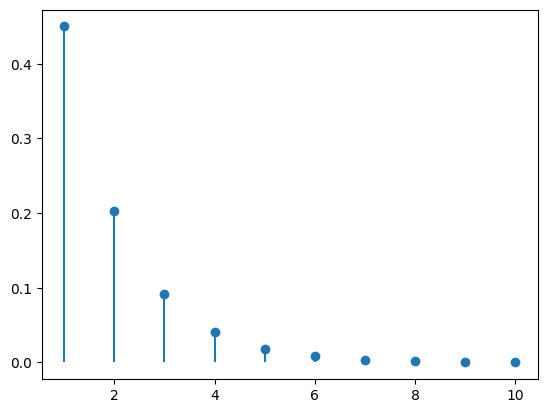

In [3]:
x = range(1, 11, 1)
y = list()
for i in x :
    y.append((9/20) ** i)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)
plt.show()

Il valore massimo è stato scelto in base al valore della probabilità $P(X \gt T)$ e sapendo che dopo $10$ la probabilità sarebbe stata sempre $0$

**10.** Sulla base del grafico generato, quanti biglietti possono ragionevolmente risultare vincenti in una settimana? 

Dal grafico è possibile notare che la prima settimana, la probabilità di vincita è del $50\%$, la seconda del $20\%$ e così a scendere

# Esercizio 2

Sia $V$ una variabile aleatoria bernoulliana che assume valore $1$ se un generico giocatore della lotteria ha vinto il premio e $0$ negli altri casi.

**1.** Quanti parametri ha la distribuzione di $V$? Indicate ognuno di essi

Siccome la variabile aleatoria $V$ modella una distribuzione Bernulliana, questa ha un solo parametro $p$ che indica la probabilità di vincita e quindi che la variaible aleatoria assuma specificazione $1$ e nel nostro caso possiamo concludere che $p = \dfrac{9}{20}$

**2.** Per $m$ $\in$ $\mathbb{N}$ siano $V_1,..,V_m$ delle variabili aleatorie che descrivono gli esiti delle giocate degli $m$ giocatori che hanno comprato il biglietto della lotteria in una settimana.
Indichiamo con $Y$ la variabile aleatoria che conta il numero totale di vincitori. Che relazione intercorre tra $Y$ e $V_1,...V_m$?

$Y = \sum_{i = 1}^m V_i$

**3.** Y segue un modello che abbiamo studiato a lezione? Se si specificare quale e i relativi parametri.

Sì una binomiale di parametri $B(m, p)$ dove $m$ è il numero di variabili aleatorie bernulliane mentre $p$ è il loro parametro. Possiamo concludere ciò siccome $Y$ è espressa come somma di $m$ variabili aleatorie tutte che seguono la stessa distribuzione bernulliana.


**4.** La distribuzione di Y è approssimabile tramite una delle leggi che abbiamo visto a lezione? Motivato la risposta, specificando di quale legge si tratti e quali valori assumano i relativi parametri.

Ci sono due modi per approssimare una varaibile aleatoria binomiale, o a una Poisson o a una Normale; la Poisson in questo caso va scartata in quanto per procedere con l'apporssimazione, il parametro $m$ deve crescere e allo stesso tempo il parametro $p$ decrescere. \
Siccome questo non avviene nel nostro caso, rimane il modello normale sfruttando il TCL possiamo approssimare una v.a. binomiale solo se $m$ è molto grande. \
I relativi parametri sono: $N\sim \left(mp, \sqrt{mp(1 - p)}\right)$

**5.** Supponiamo in questo punto che $n=3$.

$A = \dfrac{Y_1 - Y_2 + 2Y_3}{2}$ è uno stimatore per il valore atteso di $V$? In caso lo sia è distorto?

$B =\dfrac{Y_1^2 + Y_2^2 + Y_3^2}{3}$ è uno stimatore per la varianza di $V$? in caso lo sia è distorto?

$\boxed{\text{TUTTO è UNO STIMATORE DI TUTTO}}$, quindi la risposta alla domanda se $A$ è uno stimatore per il valore atteso di $V$ è sì. <br>
$$E(A) = E(Y) = mp \neq E(V) = p$$
quindi $A$ è uno stimatore distorto per il valore di $V$.

$$E(B) = \dfrac{1}{3} \cdot \left(E(Y_1^2) + E(Y_2^2) + E(Y_3^2)\right) = E(Y^2)$$

sapendo che 
$$\text{var}(Y) = E(Y^2) - E(Y)^2 \rightarrow E(Y^2) = \text{var}(Y) + E(Y)^2$$
allora:
$$\text{var}(Y) + E(Y)^2 = mp(1-p)+ m^2 \cdot p^2 \neq \text{var}(V) = p(1-p)$$
quindi $B$ è uno stimatore distorto per la varianza di $V$.

**6.** Proponete, in funzione di $V_1,..,V_n$ e di eventuali altre quantità, uno stimatore non distorto per la probabilità di vittoria giocando alla lotteria, giustificando la risposta

$E(Y) = mp$, quindi per calcolare uno stimatore per la probaiblità di vittoria, $E(X) = p$ applichiamo:
$$\dfrac{1}{m} E(Y) = p \Rightarrow S = \dfrac{Y}{m}$$
dove $S$ è uno stimatore non distorto per la probabilità di vittoria.

# ESERCIZIO 3

Abbiamo il file _lotteria.csv_ con i seguenti attributi:

- Settimana: numero della settimana all'interno dell'anno
- numero_biglietto: numero associato al biglietto venduto
- valore_vincente: valore vincente per la settimana in cui è stato venduto il biglietto

**1.** Caricare il dataset e verificare che non contenga dati incoerenti, diversi da quelli che ci si aspetta

In [9]:
lotteria = pd.read_csv('lotteria.csv', sep = ';')
lotteria

,Settimana,numero_biglietto,valore_vincente
0,13,9,7.350000
1,10,7,1.956000
2,7,8,3.117000
3,7,2,7.232000
4,1,0,1.059000
5,21,8,9.724000
6,14,6,0.509472
7,17,10,5.381000
8,1,1,3.715000
9,1,7,2.068000


**2.** Utilizzare un opportuno metodo grafico per valutare l'ipotesi che i valori dell'attributo _valore_vincente_ seguano effettivamente la distribuzione uniforme continua e commentate i risultati.

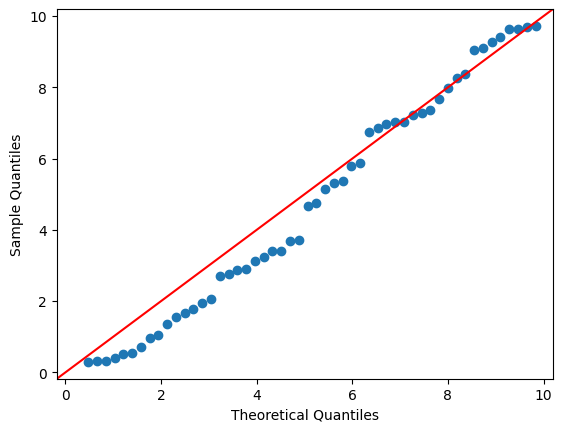

Si può notare come i punti non siano ben adagiati sulla bisettrice di 45 gradi, per cui bisogna confutare l ipotesi.


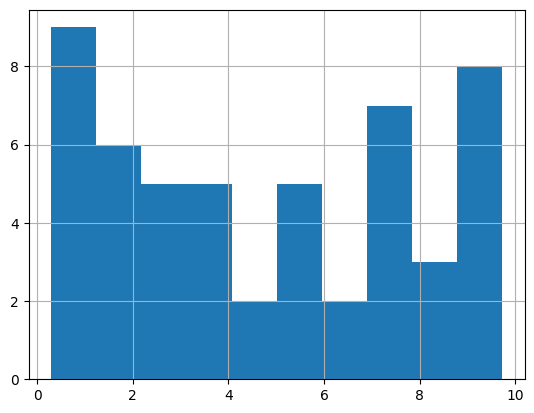

In [12]:
sm.qqplot(lotteria.valore_vincente, dist = st.uniform(lotteria.valore_vincente.min(), lotteria.valore_vincente.max()), line = "45")
plt.show()
print('Si può notare come i punti non siano ben adagiati sulla bisettrice di 45 gradi, per cui bisogna confutare l ipotesi.')
lotteria.valore_vincente.hist()
plt.show()
print('Anche l istogramma mostra delle barre non della stessa altezza.')

Possiamo affermare che il carattere _valore_vincente_ è distribuito secondo un modello uniforme continuo. Per supportare la nostra tesi possiamo graficare un istogramma per controllare che se segue il modello uniforme, allora ci si aspetta che il diagramma sia vagamente piatto.

**3.** Valutate che i valori dell'attributo _numero_biglietto_ siano effettivamente estratti dalla distribuzione uniforme discreta, motivando la scelta e commentando i risultati

Per validare tale ipotesi, possiamo visualizzare un grafico a barre delle frequenze relative, ordinando le barre in base all indice.


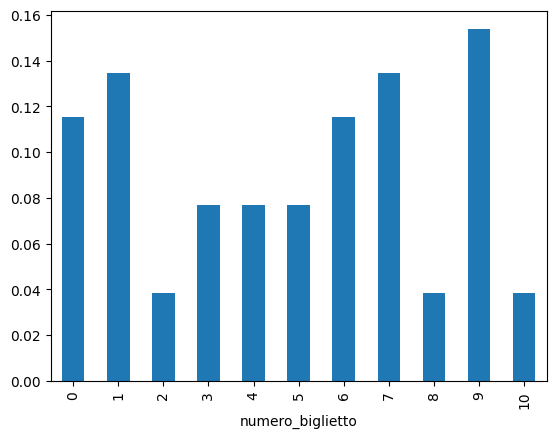

Si vede come le barre non siano tutte della stessa altezza e la maggior parte non è vicina al valore di equiprobabilità 1/10, per cui anche in questo caso si può confutare l ipotesi.


In [15]:
print('Per validare tale ipotesi, possiamo visualizzare un grafico a barre delle frequenze relative, ordinando le barre in base all indice.')
lotteria.numero_biglietto.value_counts(normalize=True).sort_index().plot.bar()
plt.show()
print('Si vede come le barre non siano tutte della stessa altezza e la maggior parte non è vicina al valore di equiprobabilità 1/10, per cui anche in questo caso si può confutare l ipotesi.')

Quello che si può fare è calcolare le frequenze relative del carattere e valutare che siano tutte distribuite più o meno intorno al valore $\dfrac{1}{10}$. Per il ristretto numero di osservazioni non abbiamo un'accurata rappresentazione grafica, tuttavia possiamo notare l'accenno di un'equiprobabilità nell'estrazione dei $10$ valori

**4.** Valutate l'ipotesi di una relazione tra la settimana e il numero associato al biglietti. A quali conclusioni siete giunti? Cosa usate per verificarlo?

Per valutare tale ipotesi si può costruire uno scatter plot dei due attributi per poi calcolare il valore dell indice di correlazione lineare.


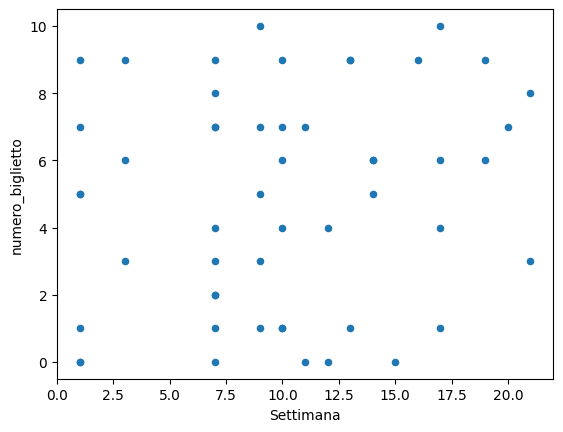

Lo scatter plot mette in evidenza l inesistenza di una qualche relazione tra i due attributi. L indice di correlazione lineare con valore 0.16841362475561317 e quindi prossimo a 0 conferma tale ipotesi.


In [18]:
print('Per valutare tale ipotesi si può costruire uno scatter plot dei due attributi per poi calcolare il valore dell indice di correlazione lineare.')
lotteria.plot.scatter('Settimana', 'numero_biglietto')
plt.show()
print(f'Lo scatter plot mette in evidenza l inesistenza di una qualche relazione tra i due attributi. L indice di correlazione lineare con valore {lotteria.Settimana.corr(lotteria.numero_biglietto)} e quindi prossimo a 0 conferma tale ipotesi.')

Siamo giunti alla conclusione che non c'è relazione tra il giorno della settimana e il numero del biglietto, a supporto della tesi c'è l'indice di correlazione

Abbiamo usato lo scatter plot e la motivazione è che è uno strumento nato apposta per valutare la relazione tra due attributi. Utilizzando l'indice di correlazione lineare si ha un valore indicante quanto è ragionevole supporre che tra i due attributi sussista una relazione lineare mentre con il diagramma a dispersione non trova solo quello ma anche altri tipi di relazione. \
È stato possibile utilizzarlo in quanto confrontare l'avanzamento del numero di settimane ha senso che aumenti anche il numero del biglietto, tuttativa abbiamo dimostrato che in questo caso non c'è correlazione

# ESERCIZIO 4

**1.** Aggiungete al dataset un attributo ```vincita``` il cui valore è $1$ se ha vinto e $0$ altrimenti per ogni caso.

In [19]:
lotteria["vincita"] = (lotteria.numero_biglietto < lotteria.valore_vincente).astype(int)
lotteria

,Settimana,numero_biglietto,valore_vincente,vincita
0,13,9,7.350000,0
1,10,7,1.956000,0
2,7,8,3.117000,0
3,7,2,7.232000,1
4,1,0,1.059000,1
5,21,8,9.724000,1
6,14,6,0.509472,0
7,17,10,5.381000,0
8,1,1,3.715000,1
9,1,7,2.068000,0


**2.** Create una serie che associa ad ogni settimana il corrispondente numero di vincite e memorizzate in una variabile _vincite_settimanali_ usando groupby.

In [20]:
vincite_settimanali = lotteria.groupby('Settimana').vincita.sum()
vincite_settimanali

Settimana
1     5
3     2
7     5
9     4
10    3
11    1
12    2
13    1
14    2
15    1
16    1
17    1
19    0
20    1
21    1
Name: vincita, dtype: int32

**3.** Quale distribuzione vi aspettate che seguano i valori contenuti in _vincite_settimanali_? Perchè? 
(sugg: può aiutare a rispondere il ragionamento che avete fatto per rispondere ad alcuni punto dell'esercizio 2).

Risposta 3: essendo i valori di vincite_settimanali definiti come somma di bernoulliane (perchè vincita può assumere solo valori 0 e 1), allora è ragionevole che siano distribuiti secondo un modello binomiale.

**4.** Verificate se i valori ottenuti in _vincite_settimanali_ sono coerenti oppure no rispetto alla risposta che avete dato al punto precedente

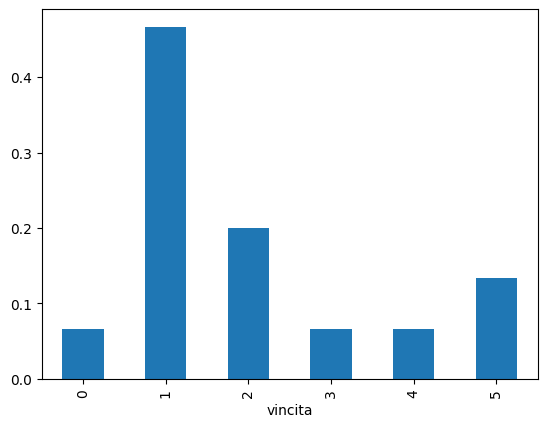

In [21]:
vincite_settimanali.value_counts(normalize=True).sort_index().plot.bar()
plt.show()
print('Il grafico ottenuto non è incompatibile con un modello binomiale, in quanto ha una forma quasi simmetrica come ci si aspetta da una binomiale')

**5.** Per rispondere alla domanda precedente avete dovuto calcolare o approssimare i valori dei parametri di qualche distribuzione? Perchè?

**6.** Utilizzate il dataset a disposizione per stimare la probabilità di vincita alla lotteria. Che stimatore avete utilizzato? Di qualce proprietà gode questo stimatore?

In [23]:
print(lotteria.vincita.mean())
print('Lo stimatore utilizzato è la media campionaria, che è sempre uno stimatore non distorto per il valore atteso della popolazione ed è sempre consistente in media quadratica.')

0.5769230769230769


**7.** I dati a disposizione vi permettono di dire che con probabilità superiore a 0.9 l'errore fatto utilizzando la stima al punto precedente è più piccolo di 0.01? motivate il ragionamento.

In [28]:
Z = st.norm(0,1)

arg = (0.01*math.sqrt(len(lotteria.vincita)))/lotteria.vincita.std()
print(f'Essendo la probabilità ottenuta {2*(Z.cdf(arg))-1} < 0.9, possiamo dire che i dati a disposizione non ci permettono di arrivare a tale conclusione')

Essendo la probabilità ottenuta 0.1149333943755011 < 0.9, possiamo dire che i dati a disposizione non ci permettono di arrivare a tale conclusione


Nei due punti successivi supporremo  che il numero settimanale di vittorie sia distribuito secondo una legge binomiale di parametri $m$ e $p$. Stimeremo quest'ultimo parametro come nel punto $6$. e supporremo che in una settimana siano stati venduti solo $10$ biglietti.

**8.** Sulla base di questa nuova ipotesi calcolate che in una settimana
- Non vi sia alcun biglietto vincente
- Vi sia esattamente un biglietto vincente
- VI si almeno un biglietto vincente
- Vi sia almeno la metà dei biglietti venduti vincenti

(suggerimento: per rispondere a questo ultimo quesito è necessario calcolare un valore di sommatoria: potete farlo a mano, sfruttare le librerie o scrivere codice esplicito)

In [40]:
m = 10
p = lotteria.vincita.mean()/m
Y = st.binom(m, p)

print(f'P(X = 0) = {Y.pmf(0)}')
print(f'P(X = 1) = {Y.pmf(1)}')
print(f'P(X >= 1) = 1 - P(X < 0) = {1- Y.cdf(0)}')
print(f'P(X >= 5) = 1 - P(X < 4) = {1- Y.cdf(4)}')

P(X = 0) = 0.5519851116551481
P(X = 1) = 0.33795006836029473
P(X >= 1) = 1 - P(X < 0) = 0.4480148883448518
P(X >= 5) = 1 - P(X < 4) = 0.00012598504911887076


**9.** Ho acquistato un biglietto, e scopro di aver vinto guardando il risultato dell'estrazione. Qual è la probabilità che almeno la metà dei biglietti venduti siano vincenti?

In [39]:
print(f'P(X > 5 | X > 1) = {(1-X.cdf(4))/(1-X.cdf(0))}')

P(X > 5 | X > 1) = 0.6


**10.** Ipotizzando che il numero di biglietti venduti in una settimana salga a $m=1500$, rispondete nuovamente alla domanda posta al punto precedente. \
In questo caso è opportuno ridurre le approssimazioni in più rispetto a quanto precedentemente svolto? In caso affermativo indicate quali sono queste approssimazioni e motivatene l'utilizzo

In [45]:
print('Essendo m = 1500, possiamo approssimare la binomiale ad una normale col TCL, avende come parametri mp e mp(1-p) sotto radice')
Z = st.norm(1500*p, math.sqrt(1500*p*(1-p)))
print(f'P(X > 5 | X > 1) = {(1-Z.cdf(749))/(1-Z.cdf(0))}')

Essendo m = 1500, possiamo approssimare la binomiale ad una normale col TCL, avende come parametri mp e mp(1-p) sotto radice
P(X > 5 | X > 1) = 0.0


Se ho utilizzato CDF va bene così nel nenso si è abbastanza confidente che quando il parametro intero della binomiale, si applica direttamente l'approssimazione normale. <br>
Se si ha calcolato a mano la somma, si va ad approssimare Y come una normale e quindi la probabilità $P\left(Y \geq 750\right) = 1 - P\left(Y \leq 749 \right) \approx 1 - F_Z(749)$ dove $Z$ è una normale con opportuni parametri ottenuta tramite la stima di Y utilizzando il teorema centrale del limite.